## Script is designed to calculate fatty acid group proportion

The raw data was taken from the DHI laboratory of AO Agroplem. The analysis was carried out on a FOSS machine. <br>
A total of 13,107 animals from the Russian population of black-motley Holstein were analysed.

LCFA - long-chain fatty acid <br>
MCFA - medium-chain fatty acid <br>
SCFA - short-chain fatty acid 

SFA - saturated fatty acids <br>
UFA -  unsaturated fatty acids

In [1]:
import pandas as pd
import numpy as np
import os,sys,glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator
from PIL import Image, ImageDraw, ImageFont
import seaborn as sns; sns.set(style="white", color_codes=True)
pd.options.mode.chained_assignment = None
from shutil import copyfile
import six
import dateutil.parser as parser

here = './'
FONT_FILE = os.path.join(here, 'static', 'Play-Regular.ttf')
%matplotlib inline

In [4]:
total_df = pd.read_csv('results/Comp1', sep = '\t')
total_df.head(2)

,LCFA,MCFA,SCFA,SFA,MUFA,PUFA,LMS_sum,LCFA_percent,MCFA_percent,SCFA_percent,UFA,FA_sum,UFA_percent,SFA_percent
M21-00302,1.44473,1.77296,0.566081,2.71253,1.04198,0.135770,3.78376,38,47,15,1.17775,3.89027,30.2741,69.7259
M21-00304,1.69741,1.53044,0.540032,2.54233,1.19672,0.150315,3.76788,45,41,14,1.34704,3.88937,34.6339,65.3661


In [9]:
input_dir='./input/'
orders = list(total_df.index.values)

In [6]:
def round_to_100_percent(number_set, digit_after_decimal=2):

    unround_numbers = [x / float(sum(number_set)) * 100 * 10 ** digit_after_decimal for x in number_set]
    decimal_part_with_index = sorted([(index, unround_numbers[index] % 1) for index in range(len(unround_numbers))], key=lambda y: y[1], reverse=True)
    remainder = 100 * 10 ** digit_after_decimal - sum([int(x) for x in unround_numbers])
    index = 0
    while remainder > 0:
        unround_numbers[decimal_part_with_index[index][0]] += 1
        remainder -= 1
        index = (index + 1) % len(number_set)
    return [int(x) / float(10 ** digit_after_decimal) for x in unround_numbers]

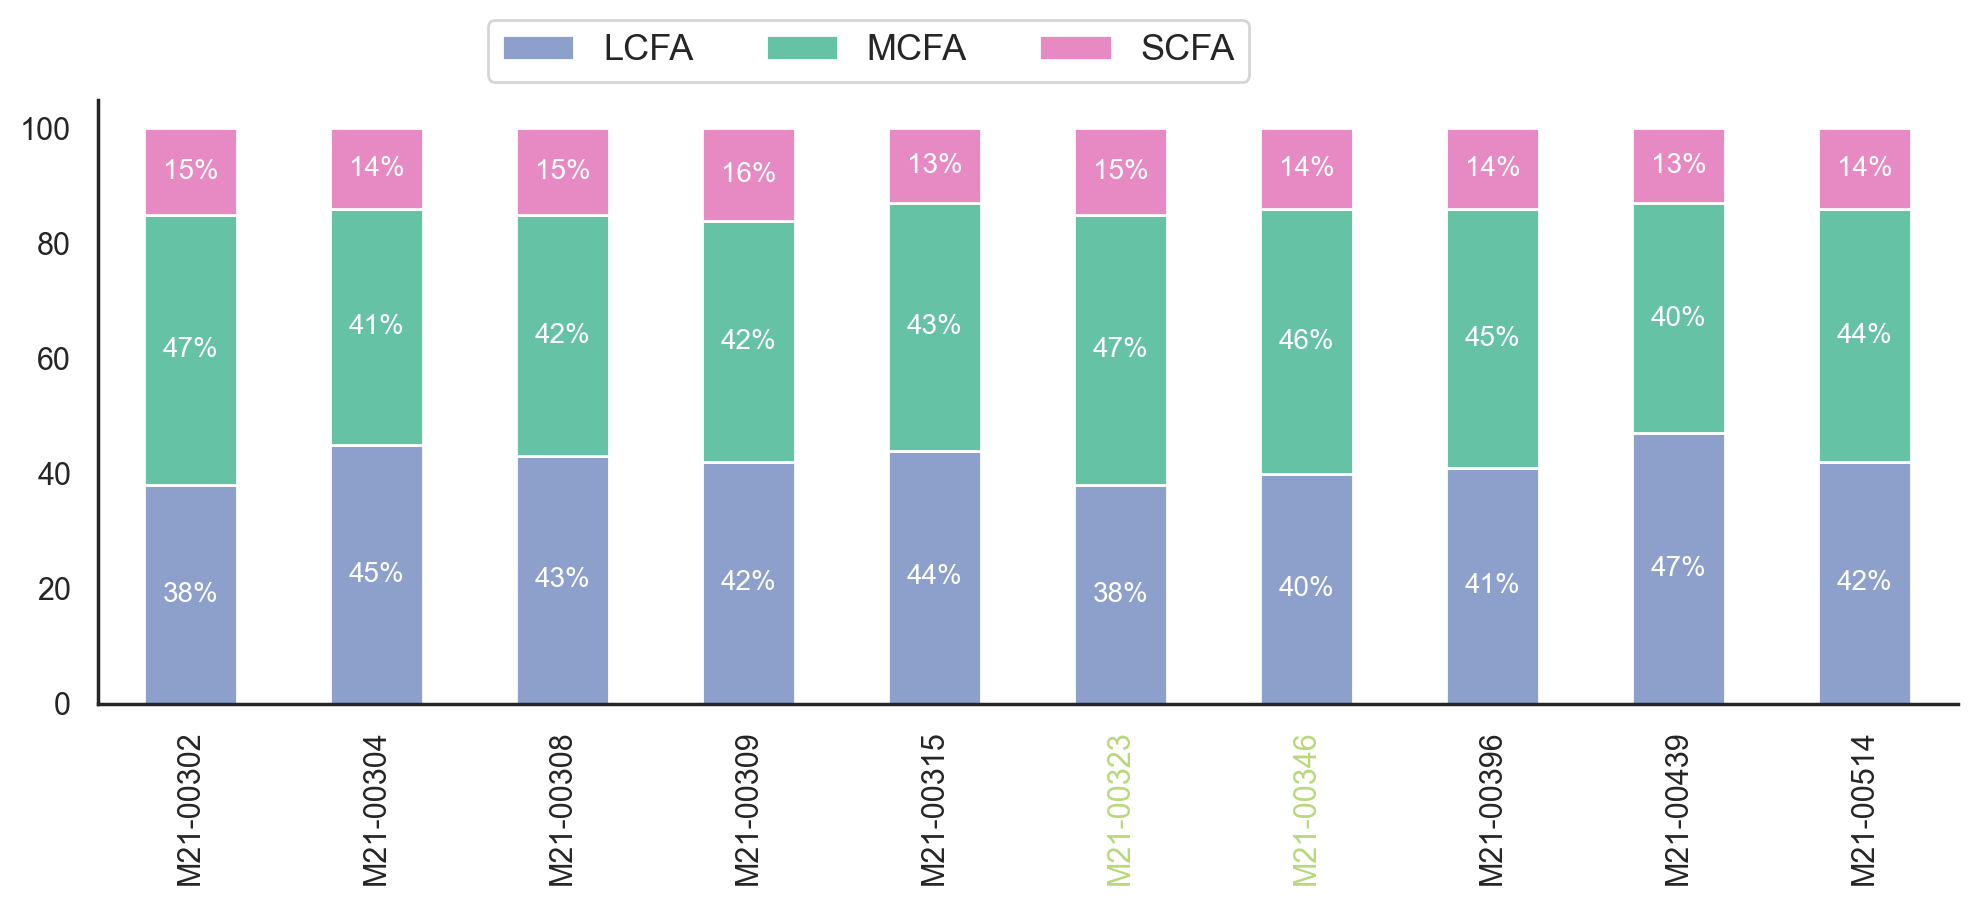

In [10]:
fig, ax = plt.subplots(1, 1,figsize=(12,4), dpi=200)

for i in range(len(total_df)):
    
    new_values = round_to_100_percent(total_df[['LCFA_percent','MCFA_percent', 'SCFA_percent']].iloc[i],0)
    total_df.at[orders[i],'LCFA_percent']= new_values[0]
    total_df.at[orders[i],'MCFA_percent']= new_values[1]
    total_df.at[orders[i],'SCFA_percent']= new_values[2]

total_df[['LCFA_percent','MCFA_percent', 'SCFA_percent']].plot(kind='bar',
                                                               stacked=True, ax=ax,
                                                              color=['#8da0cb','#66c2a5','#e78ac3'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(['LCFA', 'MCFA', 'SCFA'], ncol=3, bbox_to_anchor=(0.2, 1),
                    loc='lower left', fontsize=13)
list_values = (total_df['LCFA_percent'].tolist() 
                + total_df['MCFA_percent'].tolist()
                + total_df['SCFA_percent'].tolist())
for rect, value in zip(ax.patches, list_values):
    h = rect.get_height() /2.
    w = rect.get_width() /2.
    x, y = rect.get_xy()
    value = str(int(value))+'%'

    ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center', fontsize=10, color='white')
    
ax.get_xticklabels()[5].set_color("#b8d87a")
ax.get_xticklabels()[6].set_color("#b8d87a")

plt.savefig('./results1/LCFA_MCFA_SCFA.png', dpi=200, bbox_inches='tight')

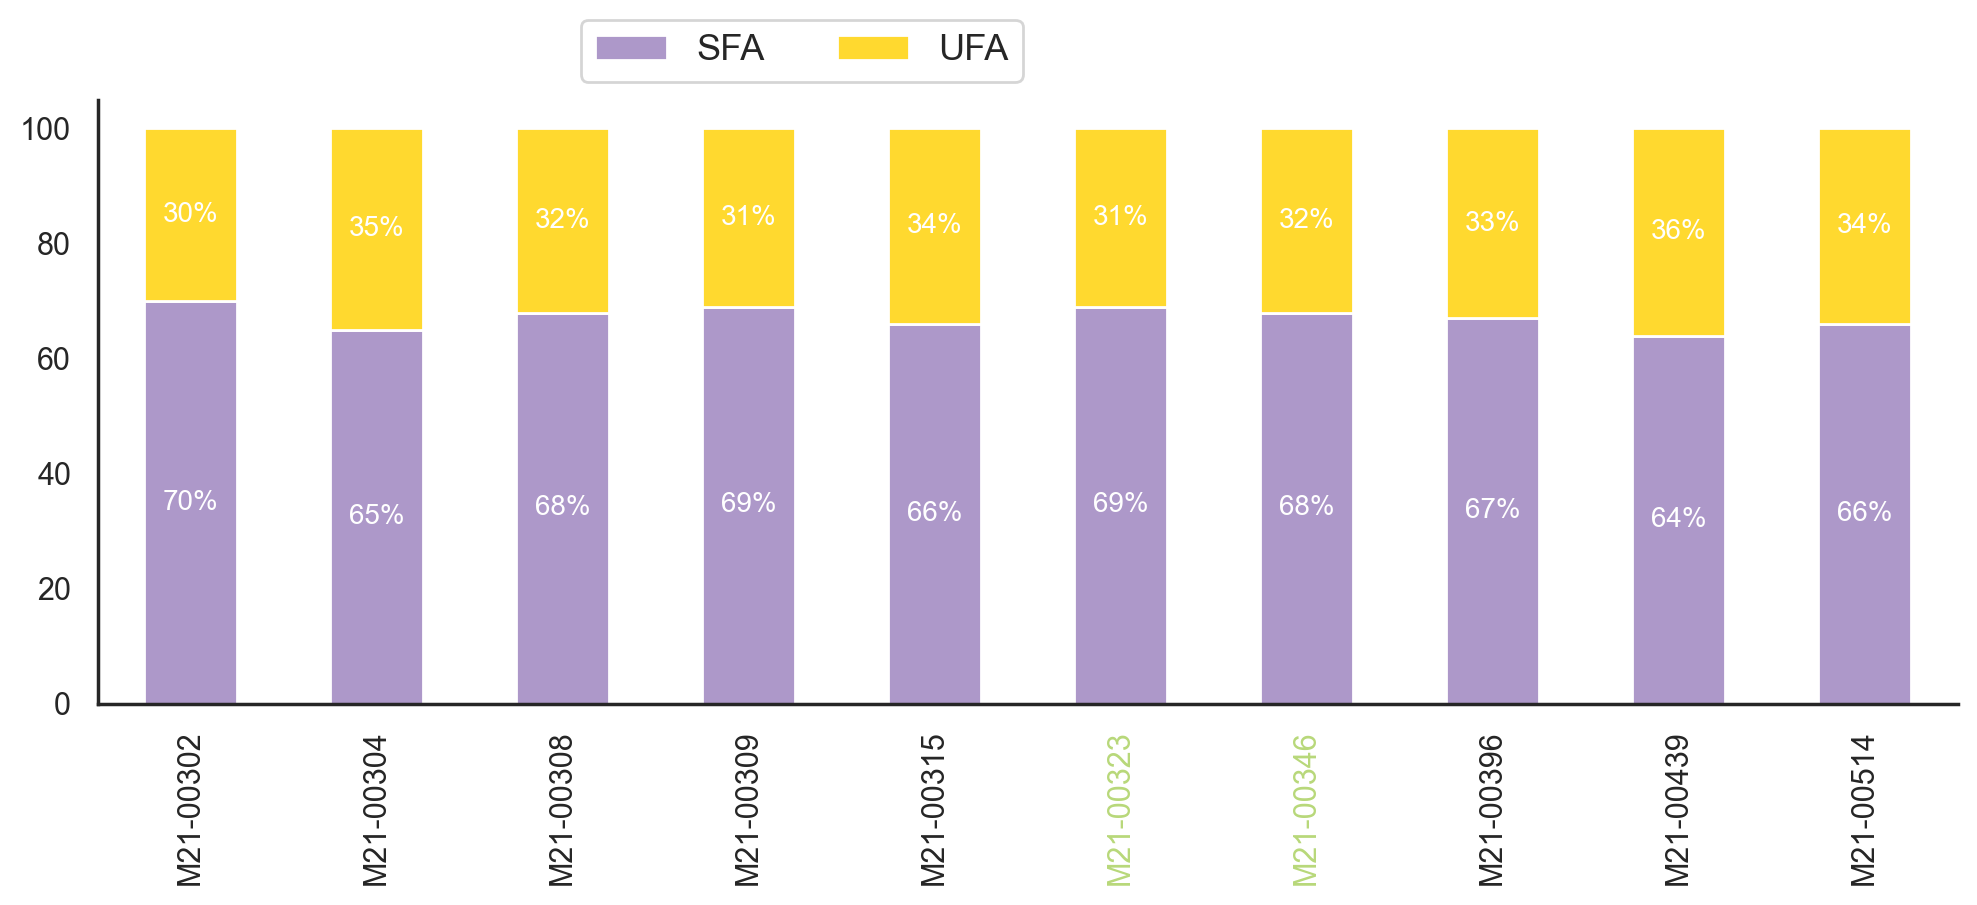

In [11]:
fig, ax = plt.subplots(1, 1,figsize=(12,4), dpi=200)

for i in range(len(total_df)):
    
    new_values = round_to_100_percent(total_df[['SFA_percent','UFA_percent']].iloc[i],0)
    total_df.at[orders[i],'SFA_percent']= new_values[0]
    total_df.at[orders[i],'UFA_percent']= new_values[1]

total_df[['SFA_percent','UFA_percent']].plot(kind='bar',
                                                               stacked=True, ax=ax,
                                                              color=['#ad98c9','#ffd92f'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(['SFA', 'UFA'], ncol=3, bbox_to_anchor=(0.25, 1),
                    loc='lower left', fontsize=13)
list_values = (total_df['SFA_percent'].tolist() 
                + total_df['UFA_percent'].tolist())
for rect, value in zip(ax.patches, list_values):
    h = rect.get_height() /2.
    w = rect.get_width() /2.
    x, y = rect.get_xy()
    value = str(int(value))+'%'

    ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center', fontsize=10, color='white')
    
ax.get_xticklabels()[5].set_color("#b8d87a")
ax.get_xticklabels()[6].set_color("#b8d87a")

plt.savefig('./results1/SFA_UFA.png', dpi=200, bbox_inches='tight')